## Convolutional Neural Network (CNN)

- Convolutional Neural Networks (CNNs) are a class of deep neural networks designed for processing and analyzing visual data, such as images and videos.
-CNNs have proven to be highly effective in tasks like image recognition, object detection, and image classification.


### Workflow:

1. **Convolution:**
   - Convolutional layers extract features from the input images by applying convolutional operations with learnable filters.

2. **Activation:**
   - Activation functions introduce non-linearities to the network, enabling it to learn complex mappings between the input and output.

3. **Pooling:**
   - Pooling layers reduce the spatial dimensions of the feature maps, focusing on the most important information.

4. **Flattening:**
   - The output from the convolutional and pooling layers is flattened into a one-dimensional vector to be fed into fully connected layers.

5. **Fully Connected Layers:**
   - Fully connected layers process the high-level features and produce the final output, often used for classification.


### Applications:

- **Image Classification:**
  - Identifying and categorizing objects within images.

- **Object Detection:**
  - Locating and classifying objects within an image.

- **Image Generation:**
  - Generating new images based on learned patterns.

CNNs have revolutionized computer vision tasks and are a fundamental architecture in many state-of-the-art models.


In [1]:
import os
import cv2
import json
import gdown
import numpy as np
from zipfile import ZipFile
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
!gdown https://drive.google.com/uc?id=11peRlF08drZrOABaIJTBZAEtWi9Hykto

Downloading...
From: https://drive.google.com/uc?id=11peRlF08drZrOABaIJTBZAEtWi9Hykto
To: /content/archive.zip
100% 26.9M/26.9M [00:00<00:00, 151MB/s] 


In [3]:
archive = ZipFile('archive.zip')
archive.extractall("/content/data")

In [4]:
data_path = os.path.join(os.getcwd(), 'data')
train_path = os.path.join(os.getcwd(), 'data', 'train')
valid_path = os.path.join(os.getcwd(), 'data', 'validation')
test_path = os.path.join(os.getcwd(), 'data', 'test')

In [5]:
labels = ["adidas", "nike"]

## Exploring Datasets

In [6]:
for split in os.listdir(data_path):
  if split != 'labelnames.csv':
    path_to_split_type = os.path.join(data_path,split)
    for category in os.listdir(path_to_split_type):
      path_to_category = os.path.join(path_to_split_type,category)
      print("There are {} {} image belonging to {} class.".format(len(os.listdir(path_to_category)),split,category))

There are 28 validation image belonging to nike class.
There are 27 validation image belonging to adidas class.
There are 30 test image belonging to nike class.
There are 30 test image belonging to adidas class.
There are 230 train image belonging to nike class.
There are 230 train image belonging to adidas class.


**<h1>Datasets Visualization </h1>**

In [7]:
def get_images(data_dir,number_of_samples):
  image_path = []
  for label in labels:
    path = os.path.join(data_dir,label)
    i = 1
    for img in os.listdir(path):
      if i > number_of_samples:
        break
      else:
        image_path.append(os.path.join(path,img))
        i += 1
  return image_path

In [8]:
def visualize_dataset(image_path,rows,cols):
  fig = plt.figure(figsize=(20,20))
  for i in range(1,rows * cols + 1):
    fig.add_subplot(rows,cols,i)
    img_array = cv2.imread(image_path[i-1])
    plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
  plt.show()

## Visualize Training Images

In [9]:
train_images_path = get_images(data_dir = train_path,
                               number_of_samples = 5)
print(train_images_path)

['/content/data/train/adidas/adidas_ (3).jpg', '/content/data/train/adidas/adidas_ (140).jpg', '/content/data/train/adidas/adidas_ (120).jpg', '/content/data/train/adidas/adidas_ (134).jpg', '/content/data/train/adidas/adidas_ (21).jpg', '/content/data/train/nike/Image_146.jpg', '/content/data/train/nike/Image_99.JPG', '/content/data/train/nike/Image_198.jpg', '/content/data/train/nike/Image_71.jpg', '/content/data/train/nike/Image_1.jpg']


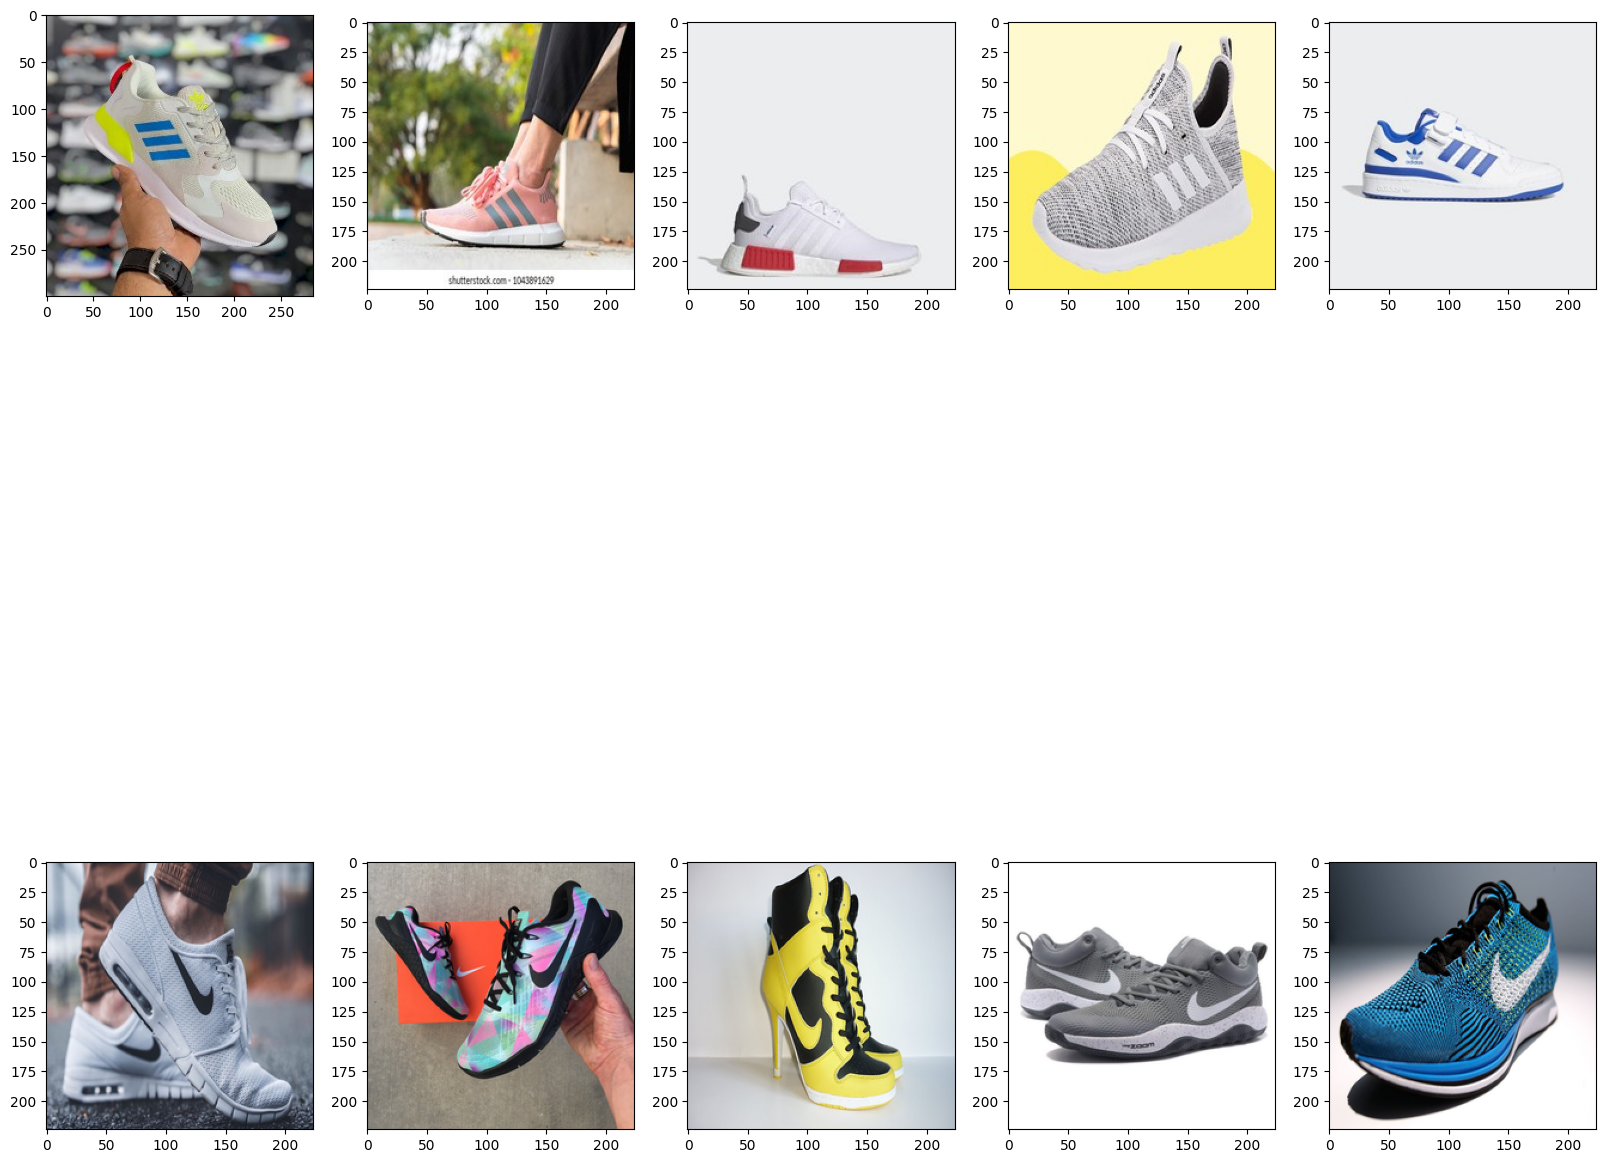

In [10]:
visualize_dataset(image_path = train_images_path,
                  rows = 2,
                  cols = 5)

## Visualizing Validation Images

In [11]:
validation_images_path = get_images(data_dir = valid_path,
                               number_of_samples = 5)
print(validation_images_path)

['/content/data/validation/adidas/adidass_(29).jpg', '/content/data/validation/adidas/adidass_(20).jpg', '/content/data/validation/adidas/adidass_(14).jpg', '/content/data/validation/adidas/adidas_ (155).jpg', '/content/data/validation/adidas/adidas_ (154).jpg', '/content/data/validation/nike/Image_291.jpg', '/content/data/validation/nike/Image_299.jpg', '/content/data/validation/nike/Image_263.jpg', '/content/data/validation/nike/Image_268.jpg', '/content/data/validation/nike/Image_266.jpg']


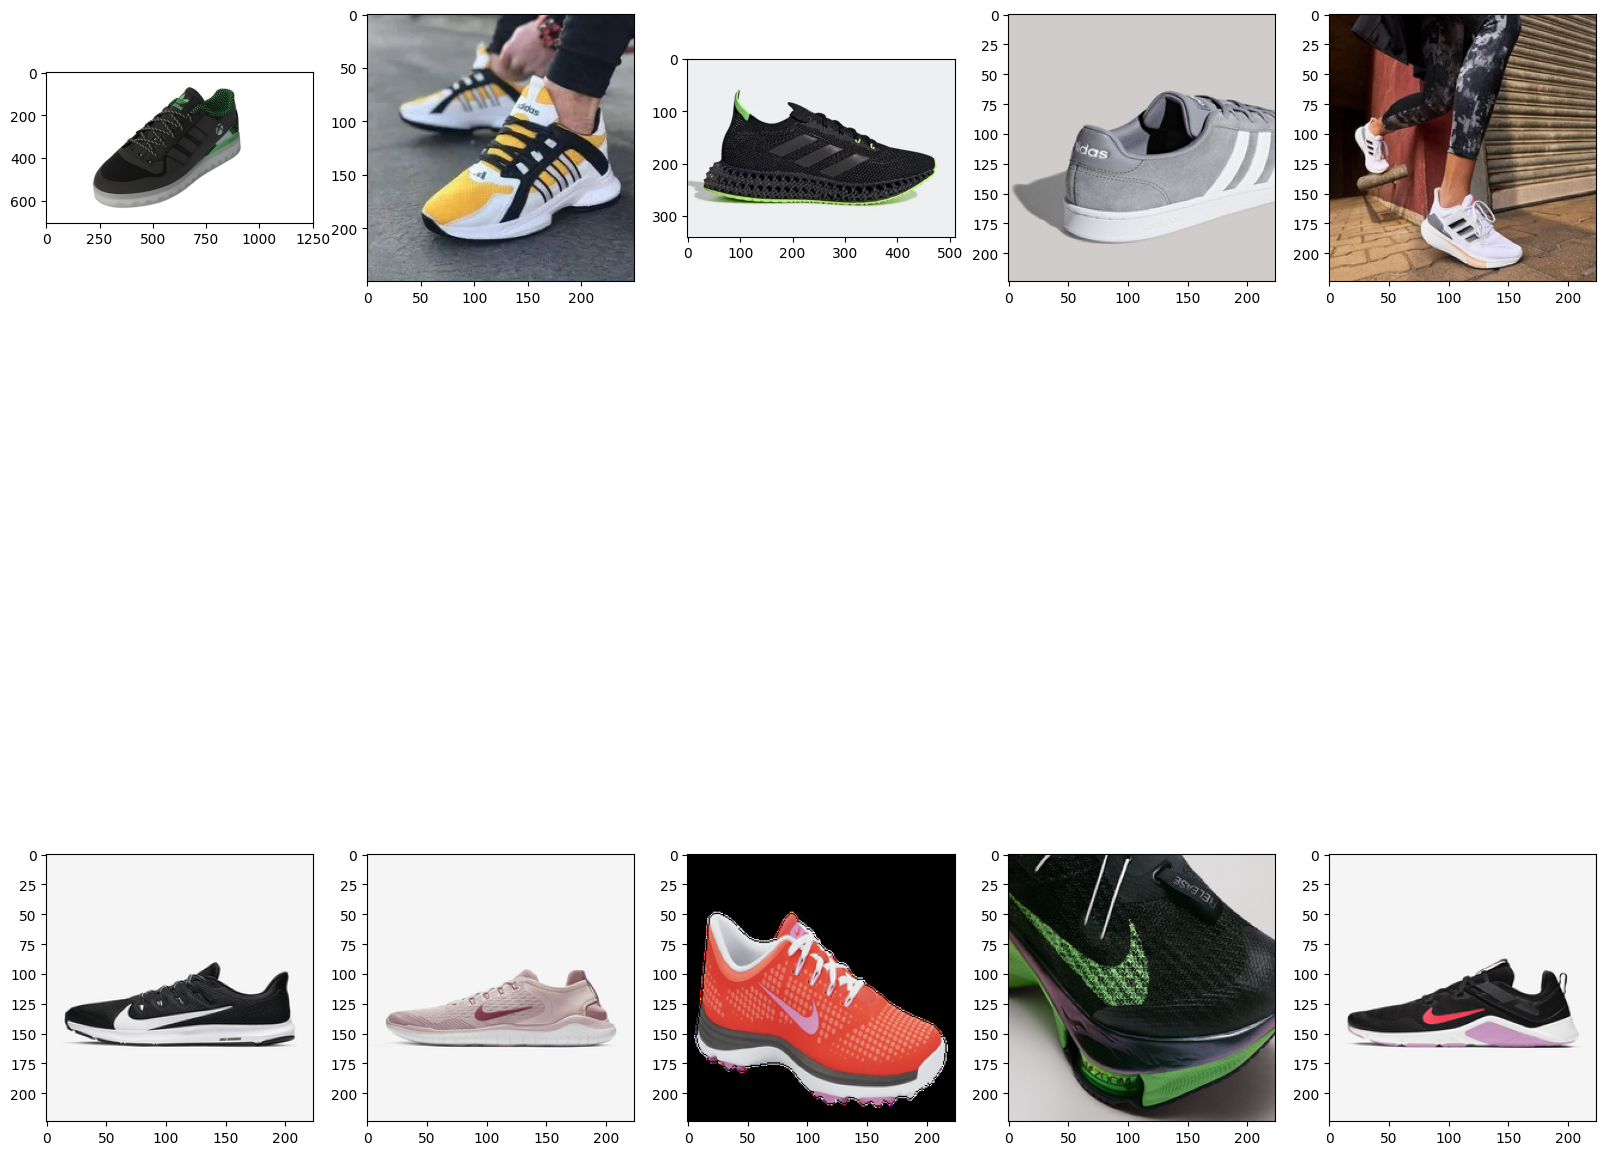

In [12]:
visualize_dataset(image_path = validation_images_path,
                  rows = 2,
                  cols = 5)

## Visualizing Testing Images

In [13]:
test_images_path = get_images(data_dir = test_path,
                               number_of_samples = 5)
print(test_images_path)

['/content/data/test/adidas/Adidas (21).JPG', '/content/data/test/adidas/aadidas_ (4).jpg', '/content/data/test/adidas/Adidas (24).jpg', '/content/data/test/adidas/aadidas_ (15).jpg', '/content/data/test/adidas/aadidas_ (17).jpg', '/content/data/test/nike/Image_220.jpg', '/content/data/test/nike/Image_110.jpg', '/content/data/test/nike/Image_257.jpg', '/content/data/test/nike/Image_80.jpg', '/content/data/test/nike/Image_60.jpg']


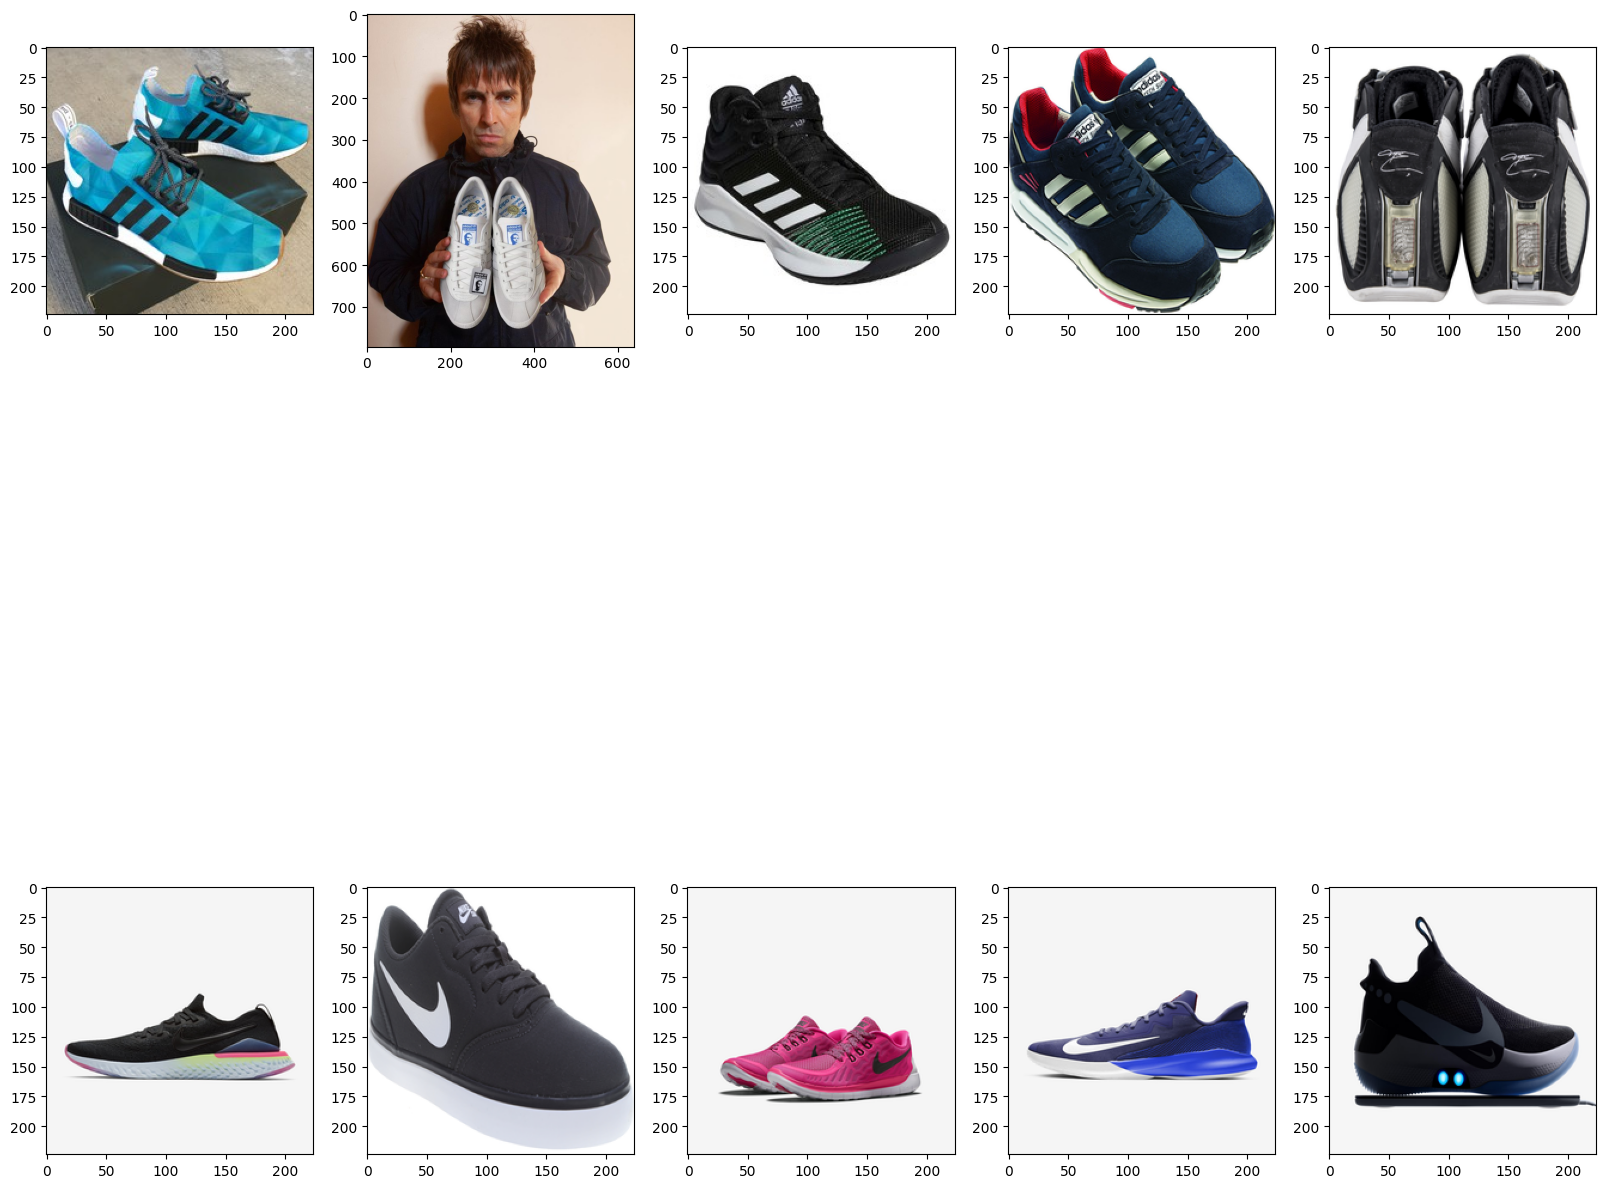

In [14]:
visualize_dataset(image_path = test_images_path,
                  rows = 2,
                  cols = 5)

<h1>Model Building & Preparation</h1>

In [15]:
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing import image


## Data Augmentation in Image Processing

- Data augmentation is a technique commonly used in machine learning, particularly in the training of deep learning models on image data.
- The goal of data augmentation is to artificially increase the size of the training dataset by applying various transformations to the existing images. This helps improve the model's generalization, robustness, and performance.

### Key Transformations:

1. **Rotation:**
   - Images are rotated by a certain degree (e.g., random rotation between 0 and 360 degrees).

2. **Flip:**
   - Horizontal and vertical flipping of images, which helps the model learn from different perspectives.

3. **Zoom:**
   - Randomly zooming in or out of images to teach the model to recognize objects at various scales.

4. **Shift:**
   - Shifting images horizontally and vertically to create variations in object positions.

5. **Brightness and Contrast Adjustment:**
   - Randomly adjusting the brightness and contrast of images to simulate different lighting conditions.


### Benefits of Data Augmentation:

- **Increased Diversity:**
  - Data augmentation introduces diversity into the training set, helping the model generalize better to unseen data.

- **Improved Robustness:**
  - The model becomes more robust to variations in lighting, orientation, and other factors present in real-world scenarios.

- **Reduced Overfitting:**
  - Augmenting the data helps prevent overfitting by exposing the model to a wider range of examples.


In [16]:
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   brightness_range=(0.8,1.2),
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.25,
                                   zoom_range=0.5,
                                   rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(224,224),
                                                    color_mode='rgb',
                                                    class_mode='binary',
                                                    batch_size=32,
                                                    shuffle=True)

Found 460 images belonging to 2 classes.


In [18]:
valid_generator = valid_datagen.flow_from_directory(valid_path,
                                                    target_size=(224,224),
                                                    color_mode='rgb',
                                                    class_mode='binary',
                                                    batch_size=32)

Found 55 images belonging to 2 classes.


## Transfer Learning

- Transfer learning is a technique in machine learning where a pre-trained model on one task is adapted for a different but related task.
- Instead of training a model from scratch for a new task, transfer learning leverages the knowledge gained from solving one problem to improve performance on a different, yet related, problem.

### Key Concepts:

1. **Pre-trained Model:**
   - Transfer learning starts with a pre-trained model that has been trained on a large dataset for a specific task, often in a domain like image classification, natural language processing, or speech recognition.
   
2. **Feature Extraction:**
   - The knowledge gained by the pre-trained model is retained in the form of learned features.
   - In early layers of the model, lower-level features like edges and textures are learned.

3. **Fine-tuning:**
   - The pre-trained model is then fine-tuned on the new task or dataset. This involves training the model on the new data while adjusting the weights of some layers to adapt to the specifics of the new task.

### Advantages:

- **Reduced Training Time:**
  - Transfer learning can significantly reduce the time and computational resources needed for training a model from scratch, especially when dealing with limited data for the new task.

- **Improved Performance:**
  - Leveraging the knowledge from a pre-trained model often leads to better generalization and performance on the new task, especially when the tasks are related.

- **Effective in Low Data Scenarios:**
  - Transfer learning is particularly useful when the new task has a small dataset, as the pre-trained model brings in knowledge from a larger dataset.

### Use Cases:

- **Image Classification:**
  - Pre-trained models on large image datasets (e.g., ImageNet) can be fine-tuned for specific image classification tasks.

- **Natural Language Processing:**
  - Models pre-trained on extensive text corpora can be fine-tuned for sentiment analysis, named entity recognition, or other NLP tasks.

- **Object Detection:**
  - Pre-trained models for object detection can be adapted to detect specific objects in new datasets.

- Transfer learning has become a key technique in many machine learning applications, allowing practitioners to achieve good results with less data and computational resources.


## VGG16


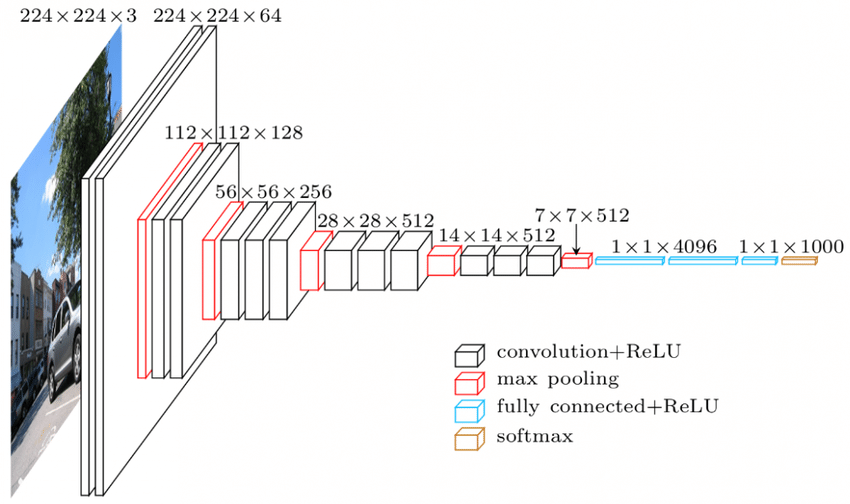


In [19]:
vgg16 = VGG16(weights="imagenet",
              include_top=False,
              input_shape=(224,224,3))

58889256/58889256 [==============================] - 0s 0us/step


In [20]:
vgg16.trainable = False

In [21]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(vgg16.layers))

# # Fine-tune from this layer onwards
# fine_tune_at = 151

# # Freeze all the layers before the `fine_tune_at` layer
# for layer in mobilenet.layers[:fine_tune_at]:
#   layer.trainable =  False

Number of layers in the base model:  19


In [22]:
output = Flatten()(vgg16.output)
output = Dropout(0.4)(output)
output = Dense(units = 8,activation='relu')(output)
prediction = Dense(1,activation='sigmoid')(output)

In [23]:
model = Model(inputs = vgg16.input,
              outputs = prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## Adam Optimizer Parameters

- **`beta_1`:** Exponential decay rate for the first moment estimates (mean). Typically set to 0.9.
  
- **`beta_2`:** Exponential decay rate for the second moment estimates (uncentered variance). Commonly set to 0.999.

- **`epsilon`:** Small constant added to the denominator for numerical stability. Commonly on the order of 1e-7 or 1e-8.

In the Adam optimizer, these parameters influence the adaptation of model weights during training by controlling the exponential decay rates and ensuring numerical stability in the optimization process.


In [24]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
),
  metrics=['accuracy']
)

In [25]:
os.mkdir('/content/model_weights/')

In [26]:
model_checkpoint = ModelCheckpoint('./model_weights/shoe_brand_model_{epoch:02d}-{val_accuracy:.6f}.h5',
                                   monitor='val_loss',
                                   mode='min',
                                   verbose=1,
                                   save_best_only=True,
                                   save_weights_only=True)

In [27]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = valid_generator,
    validation_steps = valid_generator.samples // 32,
    epochs = 20,
    callbacks=[model_checkpoint])

<ipython-input-27-c26db258a6f8>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
 9/14 [==================>...........] - ETA: 2s - loss: 0.7471 - accuracy: 0.5187

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


14/14 [==============================] - ETA: 0s - loss: 0.7410 - accuracy: 0.5187
Epoch 1: val_loss improved from inf to 0.62566, saving model to ./model_weights/shoe_brand_model_01-0.718750.h5
14/14 [==============================] - 25s 585ms/step - loss: 0.7410 - accuracy: 0.5187 - val_loss: 0.6257 - val_accuracy: 0.7188
Epoch 2/20
14/14 [==============================] - ETA: 0s - loss: 0.6843 - accuracy: 0.5794
Epoch 2: val_loss did not improve from 0.62566
14/14 [==============================] - 9s 615ms/step - loss: 0.6843 - accuracy: 0.5794 - val_loss: 0.6712 - val_accuracy: 0.5625
Epoch 3/20
14/14 [==============================] - ETA: 0s - loss: 0.6649 - accuracy: 0.6051
Epoch 3: val_loss did not improve from 0.62566
14/14 [==============================] - 7s 477ms/step - loss: 0.6649 - accuracy: 0.6051 - val_loss: 0.6605 - val_accuracy: 0.6562
Epoch 4/20
14/14 [==============================] - ETA: 0s - loss: 0.6582 - accuracy: 0.5935
Epoch 4: val_loss did not improve f

In [28]:
# serialize model to JSON
model_json = model.to_json()
with open("shoe_brand_model_vgg16.json", "w") as json_file:
    json_file.write(model_json)

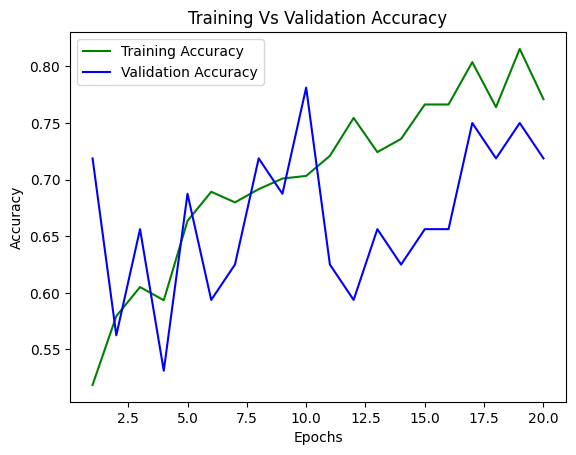

In [29]:
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs,train_accuracy,'g',label='Training Accuracy')
plt.plot(epochs,validation_accuracy,'b',label='Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [30]:
def check_predictions(dataset_dir):
  y_true = []
  y_pred = []
  images_path = []
  for category_type in os.listdir(dataset_dir):
    path_to_category_type = os.path.join(dataset_dir,category_type)
    for img in os.listdir(path_to_category_type):
      img_arr = image.load_img(os.path.join(path_to_category_type,img),
                               target_size=(224,224))
      img_arr = image.img_to_array(img_arr)
      img_arr = np.expand_dims(img_arr,axis=0)
      img_arr = img_arr / 255.0
      prediction = model.predict(img_arr)
      if prediction > 0.5:
        prediction_class = 1
        real_class = labels.index(category_type)
        y_true.append(real_class)
        y_pred.append(prediction_class)
        images_path.append(os.path.join(path_to_category_type,img))
      else:
        prediction_class = 0
        real_class = labels.index(category_type)
        y_true.append(real_class)
        y_pred.append(prediction_class)
        images_path.append(os.path.join(path_to_category_type,img))
  return [y_true,y_pred,images_path]

In [33]:
[y_true,y_pred,images_path] = check_predictions(test_path)
print(len(y_true))
print(len(y_pred))
print(len(images_path))

1/1 [==============================] - 0s 18ms/step
60
60
60


In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
#Confution Matrix and Classification Report
print('Confusion Matrix')
print(confusion_matrix(y_true, y_pred))
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=labels))

Confusion Matrix
[[19 11]
 [ 6 24]]
Classification Report
              precision    recall  f1-score   support

      adidas       0.76      0.63      0.69        30
        nike       0.69      0.80      0.74        30

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.71        60
weighted avg       0.72      0.72      0.71        60

